# Part I - (Exploring Loan Data from Prosper)
## by Ibiyinka Daramola

## Introduction


> This data set contains 113,937 loans with 81 variables on each loan from a loan company called Prosper. The variables include loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) to understand the dataset's variables.

Since there quite a number of variables, certain variables of interest would be selected to create a smaller dataset and then explored 




## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> The dataset is loaded and some wrangling are done below


In [3]:
loan= pd.read_csv('prosperLoanData.csv')

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
# There are 113937 enteries and 81 columns in the dataset

As there are quite a number of variables, a description of the columns is necessary.

This takes you to the [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) for a second look

In [6]:
loan.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [7]:
# making a copy of original data
loan_clean= loan.copy()

### Cleaning the Data

- Select only few relevant columns
- Adjust data types
- Change IncomeRange and Prosper score to CategoricalDatatype

In [8]:
loan.shape

(113937, 81)

In [9]:
loan_clean.shape

(113937, 81)

In [10]:

# Selecting only 15 columns (variables) that will be used for analysis

loan_clean = loan_clean[['ListingKey',
'ListingCreationDate',
'Term',
'LoanStatus',
'BorrowerAPR',
'ProsperScore',
'BorrowerState',
'Occupation',
'EmploymentStatus',
'IsBorrowerHomeowner',
'IncomeRange',
'TotalProsperLoans',
'OnTimeProsperPayments',
'LoanOriginalAmount',
'LoanOriginationDate']
]

In [11]:
# confirm new dataframe shape
loan_clean.shape

(113937, 15)

In [12]:
loan_clean.head(2)

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ProsperScore,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,TotalProsperLoans,OnTimeProsperPayments,LoanOriginalAmount,LoanOriginationDate
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,36,Completed,0.16516,NaN,CO,Other,Self-employed,True,"$25,000-49,999",NaN,NaN,9425,2007-09-12 00:00:00
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,36,Current,0.12016,7.0,CO,Professional,Employed,False,"$50,000-74,999",NaN,NaN,10000,2014-03-03 00:00:00


In [13]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey               113937 non-null object
ListingCreationDate      113937 non-null object
Term                     113937 non-null int64
LoanStatus               113937 non-null object
BorrowerAPR              113912 non-null float64
ProsperScore             84853 non-null float64
BorrowerState            108422 non-null object
Occupation               110349 non-null object
EmploymentStatus         111682 non-null object
IsBorrowerHomeowner      113937 non-null bool
IncomeRange              113937 non-null object
TotalProsperLoans        22085 non-null float64
OnTimeProsperPayments    22085 non-null float64
LoanOriginalAmount       113937 non-null int64
LoanOriginationDate      113937 non-null object
dtypes: bool(1), float64(4), int64(2), object(8)
memory usage: 12.3+ MB


In [14]:
# Changing datatypes


# change ListingCreationDate and LoanOriginationDate to datetime datatype, change Prosper Score to string
# change income range to ordered variable


In [15]:
# change ListingCreationDate and LoanOriginationDate to datetime datatype

loan_clean[['ListingCreationDate','LoanOriginationDate']]= loan_clean[['ListingCreationDate','LoanOriginationDate']].apply(pd.to_datetime)

In [16]:
# test

loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey               113937 non-null object
ListingCreationDate      113937 non-null datetime64[ns]
Term                     113937 non-null int64
LoanStatus               113937 non-null object
BorrowerAPR              113912 non-null float64
ProsperScore             84853 non-null float64
BorrowerState            108422 non-null object
Occupation               110349 non-null object
EmploymentStatus         111682 non-null object
IsBorrowerHomeowner      113937 non-null bool
IncomeRange              113937 non-null object
TotalProsperLoans        22085 non-null float64
OnTimeProsperPayments    22085 non-null float64
LoanOriginalAmount       113937 non-null int64
LoanOriginationDate      113937 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(4), int64(2), object(6)
memory usage: 12.3+ MB


In [17]:
loan_clean.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [18]:
# change Prosper Score dtype from float to string

In [19]:
loan_clean.ProsperScore = loan_clean.ProsperScore.astype(str)

In [20]:
# Check Prosper score

In [21]:
loan_clean.ProsperScore.value_counts()

nan     29084
4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [22]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey               113937 non-null object
ListingCreationDate      113937 non-null datetime64[ns]
Term                     113937 non-null int64
LoanStatus               113937 non-null object
BorrowerAPR              113912 non-null float64
ProsperScore             113937 non-null object
BorrowerState            108422 non-null object
Occupation               110349 non-null object
EmploymentStatus         111682 non-null object
IsBorrowerHomeowner      113937 non-null bool
IncomeRange              113937 non-null object
TotalProsperLoans        22085 non-null float64
OnTimeProsperPayments    22085 non-null float64
LoanOriginalAmount       113937 non-null int64
LoanOriginationDate      113937 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](2), float64(3), int64(2), object(7)
memory usage: 12.3+ MB


In [23]:
# Prosper Score has been changed to string

- There is a Prosper Score with value of 11, while the range in the data dictionary is 1-10
- Those with value of 11 will be added to the value of 10

In [24]:
loan_clean[loan_clean.ProsperScore==11.0].head()

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ProsperScore,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,TotalProsperLoans,OnTimeProsperPayments,LoanOriginalAmount,LoanOriginationDate


In [25]:
loan_clean['ProsperScore'].replace([11.0] , [10.0], inplace=True)

In [26]:
loan_clean.ProsperScore.value_counts()

nan     29084
4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [27]:
# Change income range and ProsperScore to ordered categorical variable

ord_var_dict= {'IncomeRange': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                'ProsperScore' : ['nan','1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0']}

for var in ord_var_dict:
    ord_var=pd.api.types.CategoricalDtype(ordered=True, categories=ord_var_dict[var])
    loan_clean[var]= loan_clean[var].astype(ord_var)

In [28]:
# check

loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey               113937 non-null object
ListingCreationDate      113937 non-null datetime64[ns]
Term                     113937 non-null int64
LoanStatus               113937 non-null object
BorrowerAPR              113912 non-null float64
ProsperScore             112481 non-null category
BorrowerState            108422 non-null object
Occupation               110349 non-null object
EmploymentStatus         111682 non-null object
IsBorrowerHomeowner      113937 non-null bool
IncomeRange              113937 non-null category
TotalProsperLoans        22085 non-null float64
OnTimeProsperPayments    22085 non-null float64
LoanOriginalAmount       113937 non-null int64
LoanOriginationDate      113937 non-null datetime64[ns]
dtypes: bool(1), category(2), datetime64[ns](2), float64(3), int64(2), object(5)
memory usage: 10.8+ MB


### What is the structure of your dataset?

>The dataset is one listing the enteries of loans given by a Loan company named Prosper. There are 113937 loan entries with 81 variables

These variables have been reduced to 15 important ones which will be used in analysis

Most of the variables are categorical 

Notably, the IncomeRange and ProsperScore are ordered variables in this order:

Least -> best

IncomeRange -  ''\\$0'', '\\$1-24,999', '\\$25,000-49,999', '\\$50,000-74,999', '\\$75,000-99,999', '\\$100,000+'

ProsperScore - '1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0'
             


### What is/are the main feature(s) of interest in your dataset?

> I would like to find out what variables affect BorrowerAPR and Loan amount borrowed

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I anticipate that the prosper score, income range and home ownership will have an influence on the amount borrowed(LoanOriginalAmount) and APR (BorrowerAPR). Borrower state, occupation are also possible implicated variables

## Univariate Exploration



In [29]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey               113937 non-null object
ListingCreationDate      113937 non-null datetime64[ns]
Term                     113937 non-null int64
LoanStatus               113937 non-null object
BorrowerAPR              113912 non-null float64
ProsperScore             112481 non-null category
BorrowerState            108422 non-null object
Occupation               110349 non-null object
EmploymentStatus         111682 non-null object
IsBorrowerHomeowner      113937 non-null bool
IncomeRange              113937 non-null category
TotalProsperLoans        22085 non-null float64
OnTimeProsperPayments    22085 non-null float64
LoanOriginalAmount       113937 non-null int64
LoanOriginationDate      113937 non-null datetime64[ns]
dtypes: bool(1), category(2), datetime64[ns](2), float64(3), int64(2), object(5)
memory usage: 10.8+ MB


Let's take a look at the Loan durations ('Terms')

In [30]:
loan_clean.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

There are 3 distinct terms of 36 months, 60 months and 12 months.
Can we plot a pie chart to check their proportions?

Text(0.5,1,'Loan Terms in Months (Proportions)')

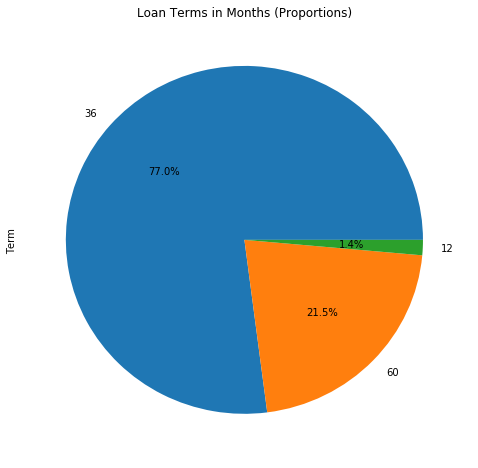

In [31]:
loan_clean.Term.value_counts().plot(kind='pie', figsize=[8,8], autopct= '%1.1f%%' )
plt.title('Loan Terms in Months (Proportions)')

- Over 75% of the loans were of 36 months tenure

Let's now explore the Loan Status

I want to have a summary info on the LoanStatus

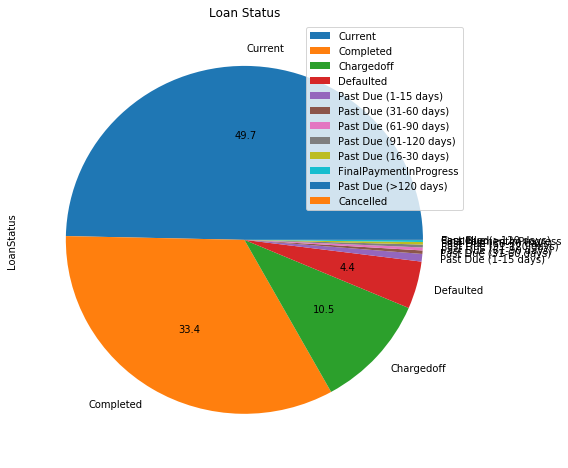

In [32]:
# Plotting pie chart for loan status

def my_autopct(pct):
    return ('%1.1f' % pct) if pct > 4 else ''
loan_clean.LoanStatus.value_counts().plot(kind='pie', figsize=[8,8], autopct=my_autopct)# '%1.1f%%' )
plt.title('Loan Status')
plt.legend()
# plt.hist(data=loan_clean , x='LoanStatus')
#plt.xscale('log')


- This revealed that about 50% of the loans were still running (Current) at that point and about 33% were already completed

Let's try the plot again, with a bar chart this time around

Text(0,0.5,'count')

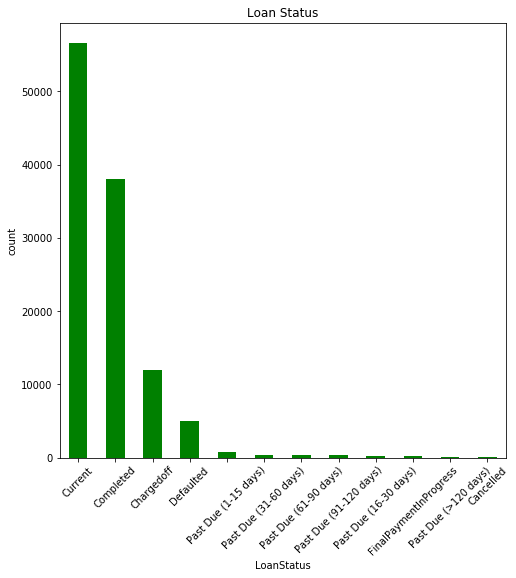

In [33]:
# Bar Chart for Loan Status

loan_clean.LoanStatus.value_counts().plot(kind='bar', figsize=[8,8], color='green')#, autopct= '%1.1f%%' )
plt.title('Loan Status')
plt.xticks(rotation=45)
plt.xlabel('LoanStatus')
plt.ylabel('count')


- Most loans are still running and a significant proportion have been completed

- A very little number of the loans have been cancelled

It is important to take a look at one of the main variables of interest: **BorrowerAPR**

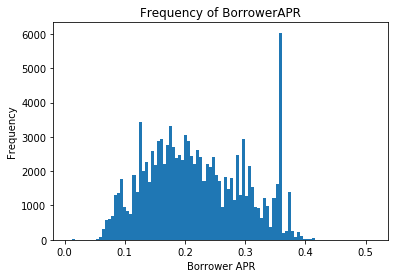

In [34]:
#Explore Borrower APR with a histogram 

plt.figure(figsize=[6,4])
loan_clean.BorrowerAPR.plot.hist(bins=100)
plt.title('Frequency of BorrowerAPR')
plt.xlabel('Borrower APR');

- This shows a roughly normal distribution with some high outliers close to 0 and around 0.35-0.37 APR values
- This would be left as it is at this point of the analysis 

Let's also explore another numerical variable of interest, the original loan amount: **LoanOriginalAmount**

In [35]:
loan_clean.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

Text(0.5,0,'Original Loan Amount')

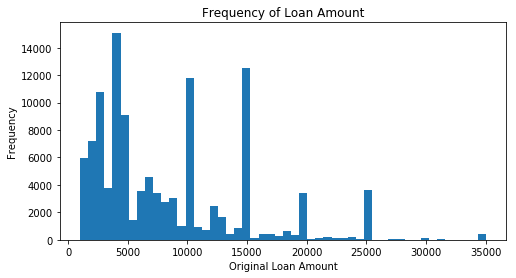

In [36]:
# Let's create a histogram plot

plt.figure(figsize=[8,4])
loan_clean.LoanOriginalAmount.plot.hist(bins=50)
plt.title('Frequency of Loan Amount')
plt.xlabel('Original Loan Amount')

- The Original Loan amount is skewed to the right with some outliers on the extreme left
- This shows that most of the data points are on the right

Text(0.5,0,'Original Loan Amount')

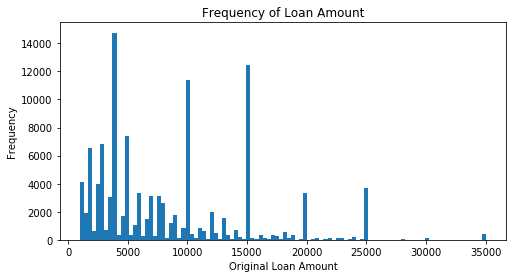

In [37]:
# Let's use a smaller bin size

plt.figure(figsize=[8,4])
loan_clean.LoanOriginalAmount.plot.hist(bins=100)
plt.title('Frequency of Loan Amount')
plt.xlabel('Original Loan Amount')

- This further reveals the skewness of the data and shows intervals of peaks . This may suggest that they might be standard amounts of loans usually given which can be varied. There are notable peaks at the 5000, 10,000, 15,000, 20,000, 25,000, 30,000 and 35,000 amounts

Let's explore some other variables

In [38]:
# Exploring ProsperScore

loan_clean.ProsperScore.value_counts()

nan     29084
4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
1.0       992
Name: ProsperScore, dtype: int64

Text(0.5,1,'ProsperScore with nan included')

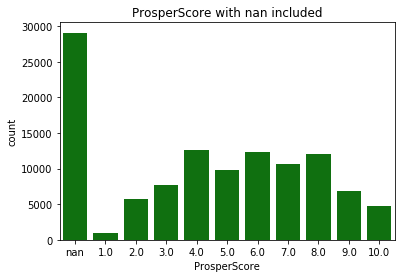

In [39]:
# loan_clean.ProsperScore.value_counts().plot(kind='bar', color='green')

sb.countplot(data=loan_clean, x='ProsperScore', color='green')
plt.xticks(rotation=0)
plt.title('ProsperScore with ''nan'' included')


- As can be seen from the chart, a significant number of entries lack the Prosper score as it was used only for loans from July 2009 (check [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0))

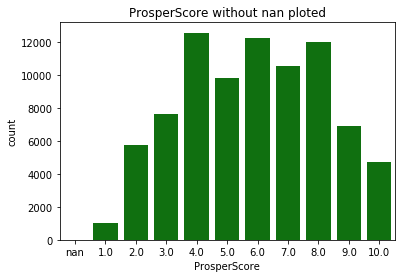

In [40]:
# Let's plot without 'nan'

sb.countplot(data=loan_clean[-(loan_clean.ProsperScore == 'nan')], x='ProsperScore', color='green')
plt.xticks(rotation=0)
plt.title('ProsperScore without ''nan'' ploted');

- Leaving out the outlier 'nan' , there is a normal distribution of the scores 

Let's explore BorrowerState

In [41]:
loan_clean.BorrowerState.value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

- Most of the loan takers were from CA while the least were from ND
- The BorrowerState has several distinct values and would not be investigated further because of this

Let's check out the Borrowers occupations:

In [42]:
loan_clean.Occupation.value_counts()

Other                                 28617
Professional                          13628
Computer Programmer                    4478
Executive                              4311
Teacher                                3759
Administrative Assistant               3688
Analyst                                3602
Sales - Commission                     3446
Accountant/CPA                         3233
Clerical                               3164
Sales - Retail                         2797
Skilled Labor                          2746
Retail Management                      2602
Nurse (RN)                             2489
Construction                           1790
Truck Driver                           1675
Laborer                                1595
Police Officer/Correction Officer      1578
Civil Service                          1457
Engineer - Mechanical                  1406
Military Enlisted                      1272
Food Service Management                1239
Engineer - Electrical           

- More than two-thirds of the occupations are filled with 'Other'
- The most common filled occupation is 'Professional' followed by 'Computer Programmer'
- The least popular is 'Student- Technical School'
- Occupation also has several distinct values and won't be used for further analysis

Let's check out Employment status

In [43]:
loan_clean.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

Text(0,0.5,'count')

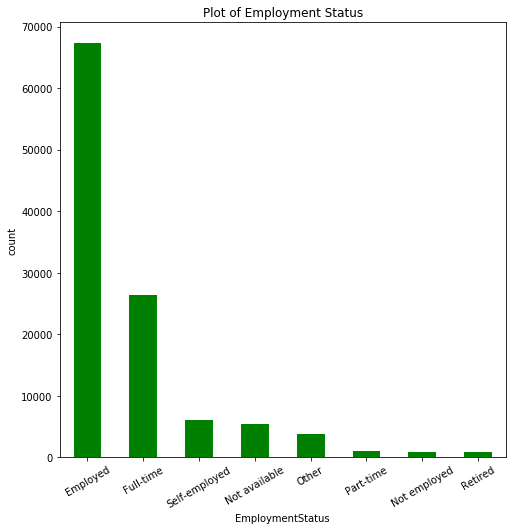

In [44]:
loan_clean.EmploymentStatus.value_counts().plot(kind='bar', figsize=[8,8] , color='green', rot=30)
plt.title('Plot of Employment Status')
plt.xlabel('EmploymentStatus')
plt.ylabel('count')

- Most of the loans were taken by employed people

What about the Borrowers Home ownership? Let's find out

Text(0.5,1,'Is the Borrower a Home Owner?')

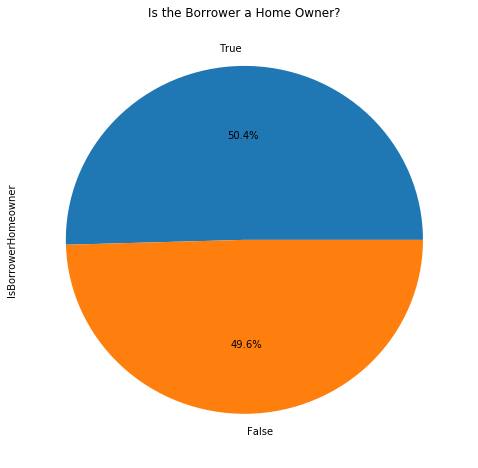

In [45]:
loan_clean.IsBorrowerHomeowner.value_counts().plot(kind='pie', figsize=[8,8], autopct= '%1.1f%%')
plt.title('Is the Borrower a Home Owner?')

- Almost half of the loans were taken by home owners

Let's check out  the Income Range

In [46]:
loan_clean.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

Text(0.5,1,'Frequency of Income Ranges')

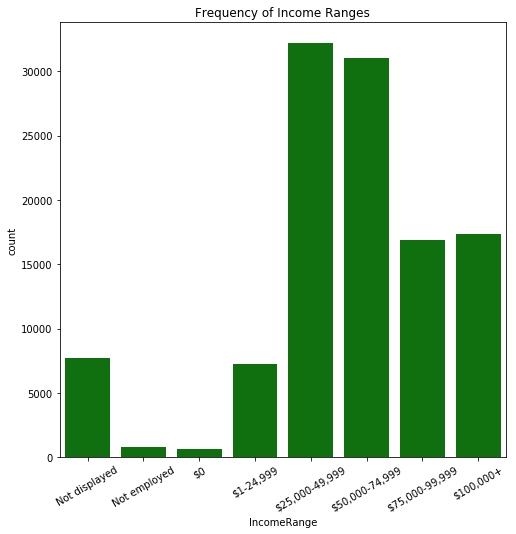

In [47]:
# loan_clean.IncomeRange.value_counts().plot(kind='bar', color='green')
plt.figure(figsize=[8,8])
sb.countplot(data=loan_clean, x='IncomeRange' , color='green')
plt.xticks(rotation=30)
plt.title('Frequency of Income Ranges')

- Most loans were given to income earners of range \\$25,000-49,999 and \\$50,000-74,999

Let's assess the totalprosperloans of each observation

In [48]:
loan_clean.TotalProsperLoans.value_counts()

1.0    15538
2.0     4540
3.0     1447
4.0      417
5.0      104
6.0       29
7.0        8
0.0        1
8.0        1
Name: TotalProsperLoans, dtype: int64

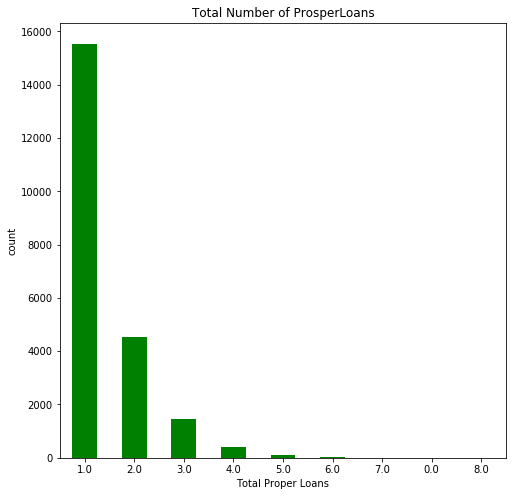

In [49]:
loan_clean.TotalProsperLoans.value_counts().plot(kind='bar',figsize=[8,8], color='green')
plt.xticks(rotation=0)
plt.title('Total Number of ProsperLoans')
plt.xlabel('Total Proper Loans')
plt.ylabel('count');

- Most people were getting their Prosper Loans for the first time

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The LoanAmount is skewed to the right , the BorrowerAPR is also slightly skewed to the right with some outliers on the left


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some outliers were identified in the BorrowerAPR which would be left in the analysis as is

## Bivariate Exploration


In [50]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
ListingKey               113937 non-null object
ListingCreationDate      113937 non-null datetime64[ns]
Term                     113937 non-null int64
LoanStatus               113937 non-null object
BorrowerAPR              113912 non-null float64
ProsperScore             112481 non-null category
BorrowerState            108422 non-null object
Occupation               110349 non-null object
EmploymentStatus         111682 non-null object
IsBorrowerHomeowner      113937 non-null bool
IncomeRange              113937 non-null category
TotalProsperLoans        22085 non-null float64
OnTimeProsperPayments    22085 non-null float64
LoanOriginalAmount       113937 non-null int64
LoanOriginationDate      113937 non-null datetime64[ns]
dtypes: bool(1), category(2), datetime64[ns](2), float64(3), int64(2), object(5)
memory usage: 10.8+ MB


In [51]:
# Let's create lists for the Numeric and the categorical variables of inteterest

numeric_vars = ['BorrowerAPR', 'LoanOriginalAmount']
categoric_vars = ['LoanStatus', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'ProsperScore']

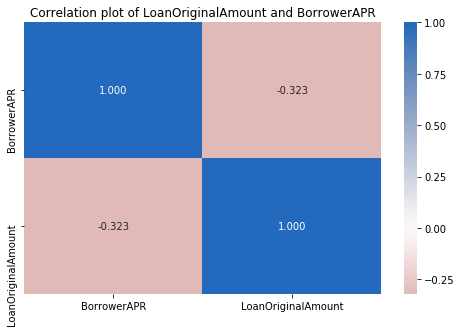

In [52]:
# Exploring the Numeric variables

# Making a correlation plot for the numeric variables
plt.figure(figsize = [8, 5])
sb.heatmap(loan_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation plot of LoanOriginalAmount and BorrowerAPR')
plt.show()

- The correlation plot gives some insight into the numerical variables
- The numerical variables will be explored further

Let's use a scatter plot to check the relationship between the numerical variables

Text(0,0.5,'LoanOriginalAmount')

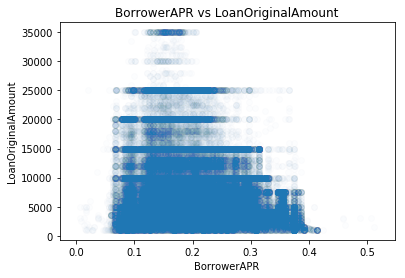

In [53]:
# Using a scatter plot to explore the numerical variables

plt.scatter(data=loan_clean, x='BorrowerAPR', y='LoanOriginalAmount', alpha =1/100)
plt.title('BorrowerAPR vs LoanOriginalAmount')
plt.xlabel('BorrowerAPR')
plt.ylabel('LoanOriginalAmount')

- There seems to be an inverse relationship between BorrowerAPR and OriginalLoanAmount.
- There is also significant overlapping of datapoints at certain intervals of about 5000 loan amount

Let's assess the categorical variables

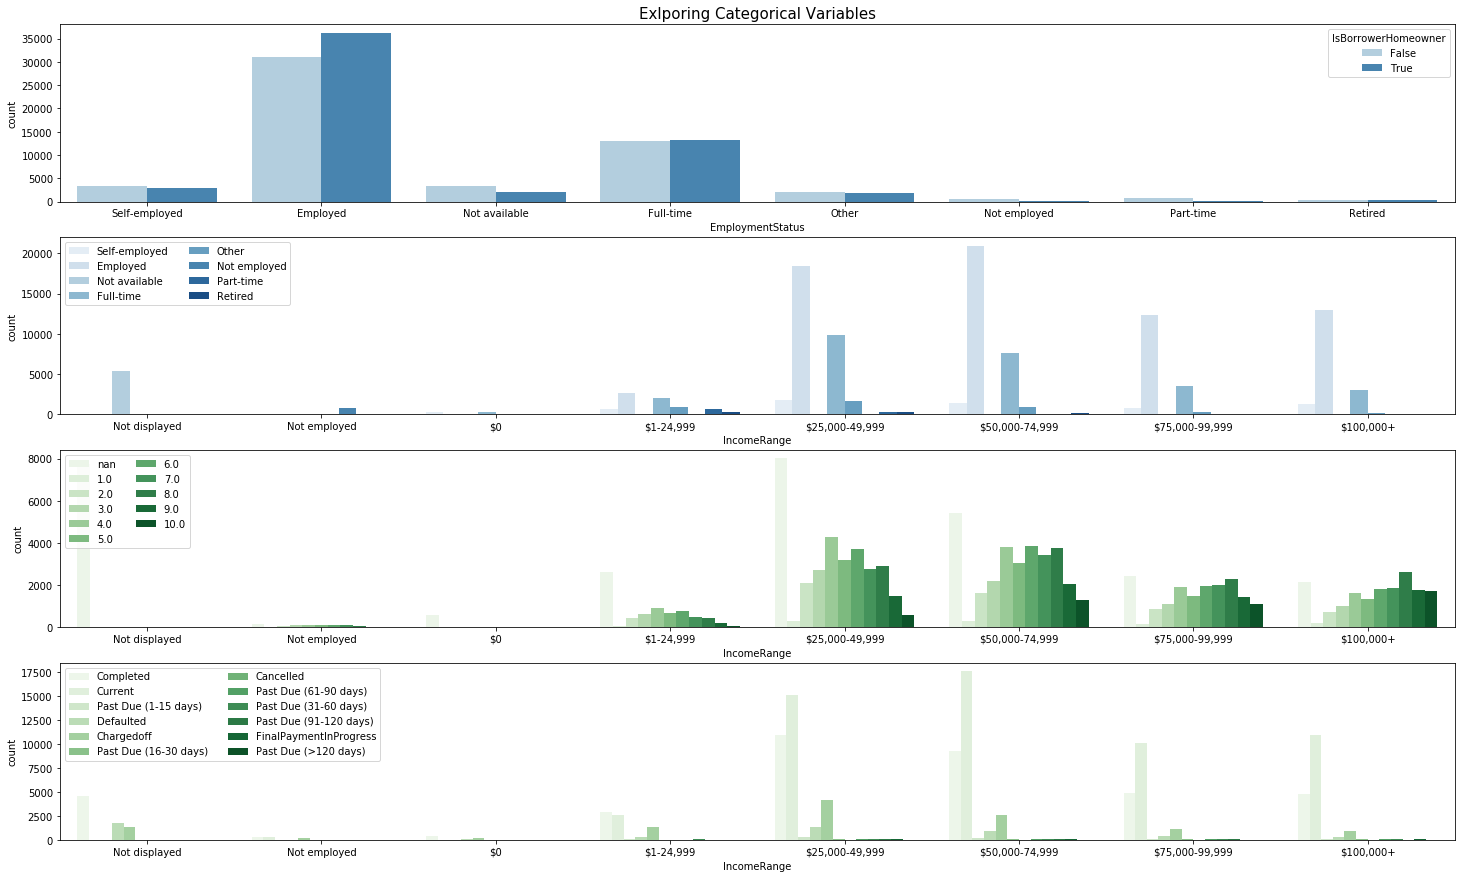

In [54]:
# lets explore the categorical variables with clustered bar charts
plt.figure(figsize = [25, 15])

# subplot 1: 'EmploymentStatus' vs 'IsBorrowerHomeowner'
plt.subplot(4, 1, 1)
sb.countplot(data = loan_clean, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner', palette = 'Blues')
plt.title('Exlporing Categorical Variables', fontsize=15)

# subplot 2: 'IncomeRange' vs. 'EmploymentStatus'
ax = plt.subplot(4, 1, 2)
sb.countplot(data = loan_clean, x = 'IncomeRange', hue = 'EmploymentStatus', palette = 'Blues')
ax.legend(loc=2, ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: 'IncomeRange' vs. 'ProsperScore'
ax = plt.subplot(4, 1, 3)
sb.countplot(data = loan_clean, x = 'IncomeRange', hue = 'ProsperScore', palette = 'Greens')
ax.legend(loc = 2, ncol = 2) # re-arrange legend to remove overlapping

# subplot 3: 'IncomeRange' vs. 'LoanStatus'
ax = plt.subplot(4, 1, 4)
sb.countplot(data = loan_clean, x = 'IncomeRange', hue = 'LoanStatus', palette = 'Greens')
ax.legend(loc = 2, ncol = 2)

plt.show()

- Most borrowers are Employed and a greater proportion of the employed people are homeowners
- All valid income ranges had a fairly normal distribution of Prosper Scores
- Most of the borrowers had their loan transactions still running

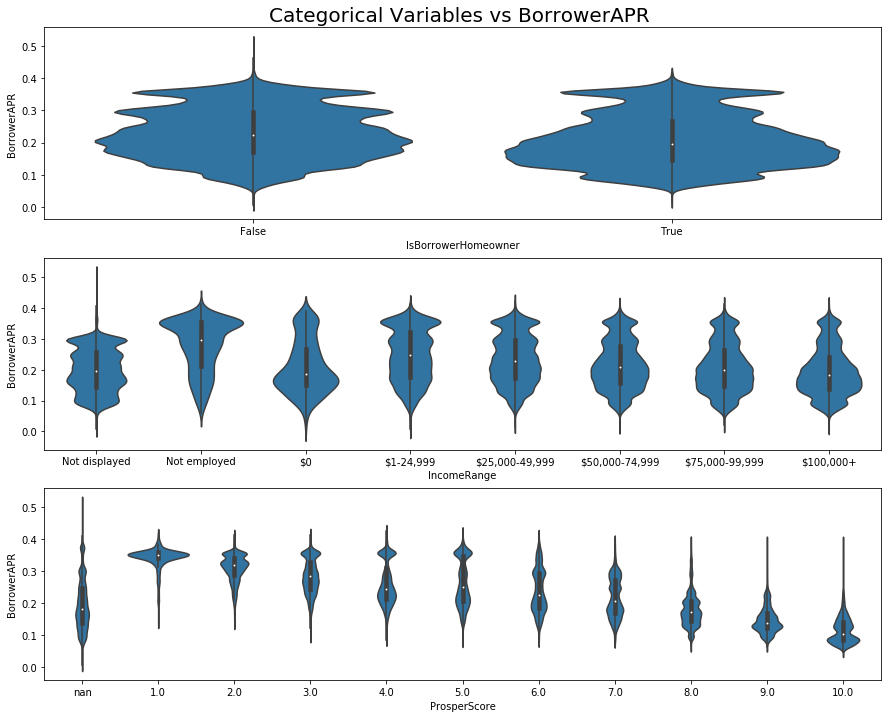

In [55]:
# Let's make violin plots of the some categorical variables vs BorrowerAPR

plt.figure(figsize = [15, 12])

default_color = sb.color_palette()[0]

# subplot 1: 'IsBorrowerHomeowner' vs. 'BorrowerAPR'
ax = plt.subplot(3, 1, 1)
sb.violinplot(data = loan_clean, x = 'IsBorrowerHomeowner', y ='BorrowerAPR', color = default_color )
ax.legend(loc=2, ncol = 2) # re-arrange legend to reduce overlapping
plt.title('Categorical Variables vs BorrowerAPR ', fontsize=20)

# subplot 2: 'IncomeRange' vs. BorrowerAPR'
ax = plt.subplot(3, 1, 2)
sb.violinplot(data = loan_clean, x = 'IncomeRange', y ='BorrowerAPR', color = default_color )
ax.legend(loc=2, ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: 'ProsperScore' vs. BorrowerAPR'
ax = plt.subplot(3, 1, 3)
sb.violinplot(data = loan_clean, x = 'ProsperScore', y ='BorrowerAPR', color = default_color )
ax.legend(loc=2, ncol = 2) # re-arrange legend to reduce overlapping



plt.show()

- The violin plots reveal some more details on the dataset.
- More homeowners had lower BorrowerAPR
- Higher income ranges had lower BorrowerAPRs
- BorrowerAPR fell with increasing ProsperScores

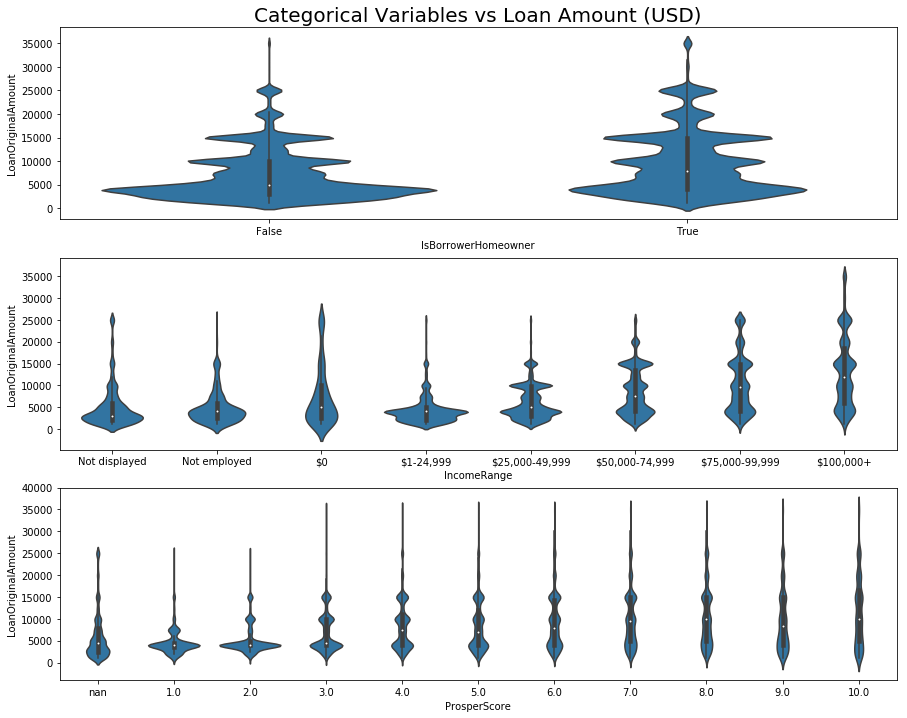

In [56]:
# Let's make violin plots again of the same categorical variables but this time against LoanOriginalAmount

plt.figure(figsize = [15, 12])

default_color = sb.color_palette()[0]

# subplot 1: 'IsBorrowerHomeowner' vs. 'LoanOriginalAmount'
ax = plt.subplot(3, 1, 1)
sb.violinplot(data = loan_clean, x = 'IsBorrowerHomeowner', y ='LoanOriginalAmount', color = default_color )
ax.legend(loc=2, ncol = 2) # re-arrange legend to reduce overlapping
plt.title('Categorical Variables vs Loan Amount (USD)', fontsize=20)

# subplot 2: 'IncomeRange' vs. BorrowerAPR'
ax = plt.subplot(3, 1, 2)
sb.violinplot(data = loan_clean, x = 'IncomeRange', y ='LoanOriginalAmount', color = default_color )
ax.legend(loc=2, ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: 'ProsperScore' vs. BorrowerAPR'
ax = plt.subplot(3, 1, 3)
sb.violinplot(data = loan_clean, x = 'ProsperScore', y ='LoanOriginalAmount', color = default_color )
ax.legend(loc=2, ncol = 2) # re-arrange legend to reduce overlapping



plt.show()

- Those without homes took larger original loan amounts
- Higher income ranges took higher loan original amount
- Original loan amount increased with increasing ProsperScore
- These will be further explored in the multivariate analysis

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 
 There seems to be an inverse relationship between BorrowerAPR and OriginalLoanAmount
 
 Most of the data points of the scatterplot between BorroweAPR and OriginalLoanAmount are concentrated at below 15000 (less than 50% of max) loan amount
 
 BorrowerAPR falls with increasing income and prosper score
 
 LoanOriginalAmount increases with increasing incomerange and Prosperscore


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> More borrowers without homes took lower loan amounts

## Multivariate Exploration

> Let us explore the ralationship between Prosperscore, borrowerAPR and Loan amount

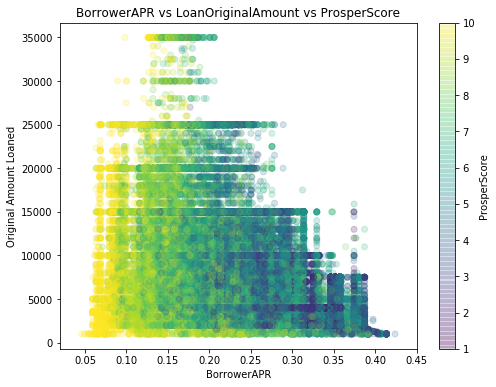

In [57]:
# Let's use a scatter plot with a color bar

plt.figure(figsize=(8,6))
plt.scatter(data = loan_clean, x ='BorrowerAPR' , y = 'LoanOriginalAmount',
                c = 'ProsperScore', alpha=1/5)
plt.colorbar(label = 'ProsperScore')
plt.xlabel('BorrowerAPR')
plt.title('BorrowerAPR vs LoanOriginalAmount vs ProsperScore')
plt.ylabel('Original Amount Loaned');

- BorrowerAPR increases with falling ProsperScore and Loan Amount

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>
There is a fall in BorrowerAPR with rising ProsperScore and Loan Amount


### Were there any interesting or surprising interactions between features?

>
It is worthy to note that the people who took higher loans and had higher prosper scores (lower risks) had lower APRs 

## Conclusions
>
BorrowerAPR falls with increasing income and prosper score
 
LoanOriginalAmount increases with increasing incomerange and Prosperscore

There is an inverse relationship of BorrowerAPR with incomerange and prosperscore

There is a direct relationship of LoanAmount with Incomerange and Prosperscore

New borrowers with higher income range and prosperscores are likely to get lower BorrowerAPR and possibly higher loan amounts
